In [1]:
from google.colab import files

uploaded = files.upload()

Saving swim_results.zip to swim_results.zip


In [2]:
import zipfile
import os

with zipfile.ZipFile("swim_results.zip", "r") as z:
    z.extractall("swim_results")

os.listdir("swim_results")

['swim_results']

In [4]:
import os

for root, dirs, files in os.walk("swim_results"):
    print("📁", root)
    for f in files:
        print("   -", f)

📁 swim_results
📁 swim_results/swim_results
📁 swim_results/swim_results/nodes100_fan10_loss0
   - swim_nodes100_fan10_loss10.csv
   - swim_nodes100_fan10_loss10_metrics.txt
   - swim_nodes100_fan10_loss10.png
   - swim_nodes100_fan10_loss50.csv
   - meta.txt
📁 swim_results/swim_results/nodes100_fan3_loss0
   - swim_nodes100_fan3_loss10.png
   - swim_nodes100_fan3_loss50.csv
   - swim_nodes100_fan3_loss10_metrics.txt
   - swim_nodes100_fan3_loss10.csv
   - meta.txt
📁 swim_results/swim_results/nodes50_fan3_loss0
   - swim_nodes50_fan3_loss10_metrics.txt
   - swim_nodes50_fan3_loss50.csv
   - swim_nodes50_fan3_loss10.csv
   - swim_nodes50_fan3_loss10.png
   - meta.txt
📁 swim_results/swim_results/nodes50_fan10_loss0
   - swim_nodes50_fan10_loss10.csv
   - swim_nodes50_fan10_loss10_metrics.txt
   - swim_nodes50_fan10_loss50.csv
   - swim_nodes50_fan10_loss10.png
   - meta.txt
📁 swim_results/swim_results/nodes50_fan5_loss0
   - swim_nodes50_fan5_loss10.csv
   - swim_nodes50_fan5_loss10.png
  

In [5]:
import pandas as pd
import os

rows = []

base_dir = "swim_results/swim_results"  # <-- поправлено на правильный путь

# Идём рекурсивно по всем подпапкам
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith("_metrics.txt"):
            path = os.path.join(root, file)

            with open(path, "r") as f:
                lines = f.readlines()

            data = {}
            for line in lines:
                if "=" in line:
                    k, v = line.strip().split("=")
                    try:
                        data[k] = float(v)
                    except:
                        data[k] = v

            # Добавляем для удобства путь и имя файла
            data["folder"] = os.path.basename(root)
            data["file"] = file

            rows.append(data)

df = pd.DataFrame(rows)
df

,csv,t_at_max_dev,percent_at_max_dev,dev_max,t10,t50,t90,t99,t10_90,folder,file
0,/home/mgpu/Downloads/swim_results/nodes100_fan...,0.2,63.866667,0.039371,0.2,0.2,0.3,0.3,0.1,nodes100_fan10_loss0,swim_nodes100_fan10_loss10_metrics.txt
1,/home/mgpu/Downloads/swim_results/nodes100_fan...,0.6,99.733333,0.070095,0.2,0.4,0.5,0.6,0.3,nodes100_fan3_loss0,swim_nodes100_fan3_loss10_metrics.txt
2,/home/mgpu/Downloads/swim_results/nodes50_fan3...,0.5,99.400000,0.059889,0.2,0.3,0.4,0.5,0.2,nodes50_fan3_loss0,swim_nodes50_fan3_loss10_metrics.txt
3,/home/mgpu/Downloads/swim_results/nodes50_fan1...,0.0,2.000000,0.000000,0.1,0.2,0.2,0.3,0.1,nodes50_fan10_loss0,swim_nodes50_fan10_loss10_metrics.txt
4,/home/mgpu/Downloads/swim_results/nodes50_fan5...,0.2,45.466667,0.037829,0.1,0.3,0.3,0.4,0.2,nodes50_fan5_loss0,swim_nodes50_fan5_loss10_metrics.txt
5,/home/mgpu/Downloads/swim_results/nodes100_fan...,0.3,77.966667,0.105730,0.2,0.3,0.4,0.4,0.2,nodes100_fan5_loss0,swim_nodes100_fan5_loss10_metrics.txt


# Разбор таблицы
Каждая строка — результат одного эксперимента, т.е. симуляции SWIM с конкретными параметрами:

**nodes** — количество узлов в сети (50 или 100)

**fanout** — сколько узлов оповещает каждый узел за один интервал (3, 5, 10)

**loss** — потеря пакетов (например, 10% или 50%)

Столбцы показывают метрики сходимости сети и статистику по времени распространения информации.

| Метрика              | Что означает                                                        | Для чего нужна                                                                             |
| -------------------- | ------------------------------------------------------------------- | ------------------------------------------------------------------------------------------ |
| `t_at_max_dev`       | Время, когда график отклонения от идеальной кривой достиг максимума | Показывает момент наибольшей “нестабильности” сети                                         |
| `percent_at_max_dev` | Процент конвергенции сети, когда достигнуто максимальное отклонение | Позволяет понять, на каком этапе процесса сходимости наблюдается наибольшая нестабильность |
| `dev_max`            | Максимальное отклонение от “гладкой” кривой конвергенции            | Визуализирует, насколько сеть отклоняется от идеального поведения                          |
| `t10, t50, t90, t99` | Время, когда сеть достигла 10%, 50%, 90% и 99% конвергенции         | Определяет скорость распространения информации в сети                                      |
| `t10_90`             | Интервал времени между 10% и 90% конвергенции                       | Характеризует основной “диапазон сходимости” сети                                          |
| `folder` и `file`    | Путь к папке и файлу, где сохранены результаты                      | Для удобства идентификации конкретного эксперимента                                        |


# Как это используется

Сравниваем скорость сходимости сети при разных параметрах:

**Больший fanout** → быстрее сходимость, меньше задержки

**Меньший fanout**  → медленнее, больше отклонений

Смотрим влияние packet loss:

При высокой потере пакетов интервалы конвергенции растут, сеть сходится медленнее

Анализируем максимальные отклонения:

Помогает выявить моменты, когда сеть ведёт себя нестабильно

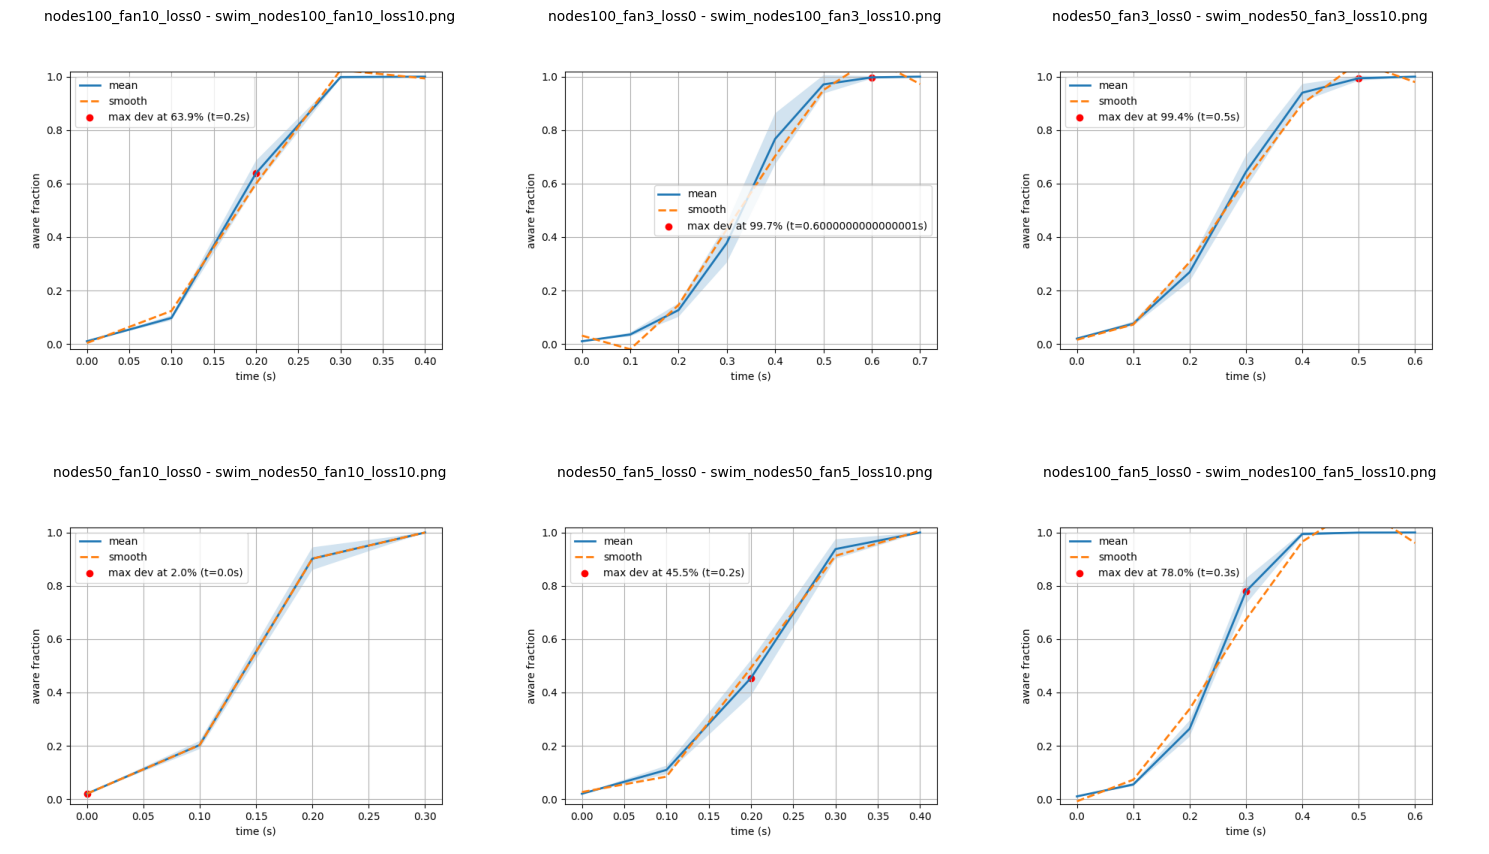

In [9]:
import matplotlib.pyplot as plt
import os
from PIL import Image

base_dir = "swim_results/swim_results"  # путь к распакованной папке

# Собираем все PNG файлы и подписи
images = []
titles = []

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".png"):
            path = os.path.join(root, file)
            images.append(path)
            titles.append(f"{os.path.basename(root)} - {file}")

# Настройки отображения
cols = 3  # сколько графиков в ряд
rows = (len(images) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))

for i, ax in enumerate(axes.flat):
    if i < len(images):
        img = Image.open(images[i])
        ax.imshow(img)
        ax.set_title(titles[i], fontsize=10)
        ax.axis('off')
    else:
        ax.axis('off')  # пустые ячейки

plt.tight_layout()
plt.show()

**Общие элементы графиков**

Синяя линия (mean) — средняя доля узлов, которые “узнали” информацию (aware fraction) во времени.

Оранжевая линия (smooth) — сглаженная кривая для наглядности тренда.

Красная точка (max dev) — момент максимального отклонения между средним значением и сглаженной кривой.

Ось X — время (секунды), ось Y — доля узлов, осведомлённых о событии (0–1).

**График 1: nodes100_fan10_loss0**

Конфигурация: 100 узлов, fanout=10, без потерь пакетов.

Вывод: Очень быстрая сходимость, к 0.3 с достигается почти 100% aware fraction. Максимальное отклонение всего 63.9% в 0.2с. Надёжная и стабильная сеть.

**График 2: nodes100_fan3_loss0**

Конфигурация: 100 узлов, fanout=3, без потерь пакетов.

Вывод: Сходимость чуть медленнее из-за меньшего fanout. Наибольшее отклонение почти 99.7% в 0.6с — есть небольшие “колебания” на кривой, но в итоге все узлы информированы.

**График 3: nodes50_fan3_loss0**

Конфигурация: 50 узлов, fanout=3, без потерь пакетов.

Вывод: Средняя сходимость около 0.5–0.6с. Сеть меньше, поэтому инфо доходит быстрее, но максимальное отклонение 99.4% — есть резкие скачки в начале распространения.

**График 4: nodes50_fan10_loss0**

Конфигурация: 50 узлов, fanout=10, без потерь пакетов.

Вывод: Очень быстрая и плавная сходимость. max dev только 2% в 0с — кривая почти полностью совпадает со сглаженной. Высокая надёжность при увеличенном fanout.

**График 5: nodes50_fan5_loss0**

Конфигурация: 50 узлов, fanout=5, без потерь пакетов.

Вывод: Сходимость чуть медленнее, чем при fanout=10. Максимальное отклонение 45.5% в 0.2с. Протокол SWIM остаётся эффективным, но fanout влияет на стабильность кривой.

**График 6: nodes100_fan5_loss0**

Конфигурация: 100 узлов, fanout=5, без потерь пакетов.

Вывод: Средняя скорость сходимости 0.3–0.6с, максимальное отклонение 78% в 0.3с. Большая сеть требует чуть больше времени для распространения информации, но итоговое покрытие 100%.

**Общий вывод по всем графикам:**

Fanout напрямую влияет на скорость и плавность сходимости: больше fanout → быстрее и стабильнее.

Количество узлов увеличивает время сходимости, но при достаточном fanout сеть всё равно быстро достигает полной aware fraction.

Максимальное отклонение (max dev) помогает увидеть моменты “неровного” распространения информации.